# Objective:
### To discover meaningful associations between items frequently bought together in a retail dataset, which can be used to optimize store layouts, inform cross-selling strategies, and improve customer recommendations.



In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_excel('Online Retail (1).xlsx')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df = df.dropna()
df = df[df['Quantity']>0]

In [11]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
basket = df[df['Country']== 'United Kingdom'].pivot_table(index = 'InvoiceNo',columns='Description',values='Quantity',aggfunc = 'sum').fillna(0)
basket = basket.applymap(lambda x: 1 if x>0 else 0)

In [13]:
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
item_counts = basket.sum().sort_values(ascending=False).head(50)
basket_filtered = basket[item_counts.index]

# Apply Apriori on the filtered data
frequent_itemsets = apriori(basket_filtered, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

    support                              itemsets
0  0.113160  (WHITE HANGING HEART T-LIGHT HOLDER)
1  0.086912             (JUMBO BAG RED RETROSPOT)
2  0.084690            (REGENCY CAKESTAND 3 TIER)
3  0.078083       (ASSORTED COLOUR BIRD ORNAMENT)
4  0.077542                       (PARTY BUNTING)


In [18]:
frequent_itemsets = apriori(basket,min_support=0.05,use_colnames=True)
print(frequent_itemsets.head())

    support                         itemsets
0  0.078083  (ASSORTED COLOUR BIRD ORNAMENT)
1  0.055739          (HEART OF WICKER SMALL)
2  0.086912        (JUMBO BAG RED RETROSPOT)
3  0.059823        (LUNCH BAG  BLACK SKULL.)
4  0.052976            (LUNCH BAG CARS BLUE)


In [19]:
frequent_itemsets = apriori(basket,min_support=0.01,use_colnames = True,low_memory=True)
print(frequent_itemsets.head(10))

    support                               itemsets
0  0.010631     ( SET 2 TEA TOWELS I LOVE LONDON )
1  0.012013               (10 COLOUR SPACEBOY PEN)
2  0.010631      (12 MESSAGE CARDS WITH ENVELOPES)
3  0.014956        (12 PENCIL SMALL TUBE WOODLAND)
4  0.017118  (12 PENCILS SMALL TUBE RED RETROSPOT)
5  0.016397          (12 PENCILS SMALL TUBE SKULL)
6  0.012433   (12 PENCILS TALL TUBE RED RETROSPOT)
7  0.012493          (12 PENCILS TALL TUBE SKULLS)
8  0.010811        (12 PENCILS TALL TUBE WOODLAND)
9  0.011772  (15CM CHRISTMAS GLASS BALL 20 LIGHTS)


In [21]:
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules = rules.sort_values(['confidence','lift'],ascending=[False,False])

print(rules.head())

                                           antecedents  \
148                                (HERB MARKER THYME)   
149                             (HERB MARKER ROSEMARY)   
938  (WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...   
943  (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...   
607  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   

                              consequents  antecedent support  \
148                (HERB MARKER ROSEMARY)            0.010751   
149                   (HERB MARKER THYME)            0.010872   
938  (WOODEN STAR CHRISTMAS SCANDINAVIAN)            0.010992   
943     (GREEN REGENCY TEACUP AND SAUCER)            0.013514   
607     (GREEN REGENCY TEACUP AND SAUCER)            0.023004   

     consequent support   support  confidence       lift  leverage  conviction  
148            0.010872  0.010151    0.944134  86.844687  0.010034   17.705400  
149            0.010751  0.010151    0.933702  86.844687  0.010034   14.921166  
938            0.

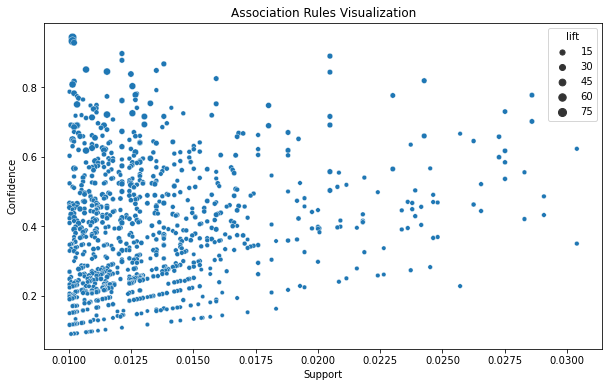

In [22]:
#lets see with the plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='support',y = 'confidence',size='lift',data=rules)
plt.title('Association Rules Visualization')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [29]:
print(rules[['antecedents','consequents','support','confidence','lift']].head())

                                           antecedents  \
148                                (HERB MARKER THYME)   
149                             (HERB MARKER ROSEMARY)   
938  (WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...   
943  (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...   
607  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   

                              consequents   support  confidence       lift  
148                (HERB MARKER ROSEMARY)  0.010151    0.944134  86.844687  
149                   (HERB MARKER THYME)  0.010151    0.933702  86.844687  
938  (WOODEN STAR CHRISTMAS SCANDINAVIAN)  0.010211    0.928962  38.569287  
943     (GREEN REGENCY TEACUP AND SAUCER)  0.012133    0.897778  24.423370  
607     (GREEN REGENCY TEACUP AND SAUCER)  0.020482    0.890339  24.221015  


## Antecedents: (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACUP AND SAUCER)
Consequents: (GREEN REGENCY TEACUP AND SAUCER)
Support: 0.012133
Confidence: 0.897778
Lift: 24.423370


Interpretation:
If a customer buys a REGENCY CAKESTAND 3 TIER and a ROSES REGENCY TEACUP AND SAUCER, there is an 89.7% chance they will also buy a GREEN REGENCY TEACUP AND SAUCER.
The lift of 24.42 means they are about 24 times more likely to buy this item if they already bought the two antecedents, compared to a random chance purchase.

## Confidence gives us the probability of the items being bought together.
## Lift tells us how much more likely the consequent will be bought if the antecedent is bought, compared to random chance. A lift value greater than 1 indicates a strong association, and the higher the number, the stronger the relationship.

## Support Calculation:


Support
=
Number of transactions with the item
Total number of transactions
Support= 
Total number of transactions
---------------------------------------------
Number of transactions with the item
​
 


##  Example
### Support: 0.010631 means 1.06% of transactions included the item SET 2 TEA TOWELS I LOVE LONDON.
### Itemset: The item being considered is just one item: (SET 2 TEA TOWELS I LOVE LONDON).

#  What Are Association Rules?
### Association rules help us understand the relationship between items by defining:

### Antecedent (X): The item or set of items that, if purchased, may lead to the purchase of other items.
### Consequent (Y): The item or set of items that are likely to be purchased when the antecedent is purchased.
### Confidence: The likelihood of purchasing Y when X is purchased.
